In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
from urllib.request import urlretrieve

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import seaborn as sns
# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [22]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))
from src.dataset.dsets import getCandidateInfoList, getCt, LunaDataset
from src.visualization.vis import findPositiveSamples, showCandidate

In [8]:
# reload settings
%load_ext autoreload
%autoreload 2

In [9]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

In [10]:
# graph setting
sns.set()

In [11]:
# gpu
torch.cuda.is_available()

True

## dataset

In [14]:
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [29]:
candidateInfo_list

[CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481)),
 CandidateInfoTuple(isNodule_bool=True, diam

In [15]:
print(len(positiveInfo_list))
print(positiveInfo_list[0])

1351
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))


In [16]:
for i in range(0, len(diameter_list), 100):
    print('{:4}  {:4.1f} mm'.format(i, diameter_list[i]))

   0  32.3 mm
 100  17.7 mm
 200  13.0 mm
 300  10.0 mm
 400   8.2 mm
 500   7.0 mm
 600   6.3 mm
 700   5.7 mm
 800   5.1 mm
 900   4.7 mm
1000   4.0 mm
1100   0.0 mm
1200   0.0 mm
1300   0.0 mm


In [17]:
for candidateInfo_tup in positiveInfo_list[:10]:
    print(candidateInfo_tup)
for candidateInfo_tup in positiveInfo_list[-10:]:
    print(candidateInfo_tup)
    
for candidateInfo_tup in positiveInfo_list:
    if candidateInfo_tup.series_uid.endswith('565'):
        print(candidateInfo_tup)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.

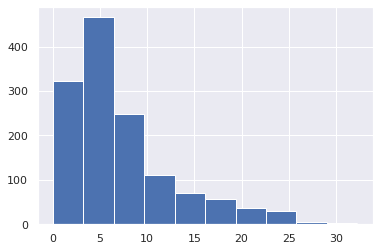

In [20]:
plt.hist(diameter_list);

In [23]:
positiveSample_list = findPositiveSamples()

2021-03-07 08:22:07,896 INFO     pid:25281 src.dataset.dsets:173:__init__ <src.dataset.dsets.LunaDataset object at 0x7f1f73995e20>: 56938 training samples


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=8.368487089, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.868211851413924881662621747734', center_xyz=(-81.68, 82.68, -167.4))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=10.93827513, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.188376349804761988217597754952', center_xyz=(-55.911605232, 175.416751344, -405.328583147))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=6.005399015, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.281489753704424911132261151767', center_xyz=(110.14, -31.2, -241.36))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(57.43, 78.25, -221.27))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.188376349804761988217597754952', center_xyz=(-86.9514169487, 162.142965995, -455.060669104))
5 CandidateInfoTuple(isNodule_bool=True, diameter_mm=4.81314585

2021-03-07 08:22:12,251 INFO     pid:25281 src.dataset.dsets:173:__init__ <src.dataset.dsets.LunaDataset object at 0x7f1f73cb7280>: 848 training samples


<IPython.core.display.Javascript object>

1.3.6.1.4.1.14519.5.2.1.6279.6001.450501966058662668272378865145 44 False [44, 810]


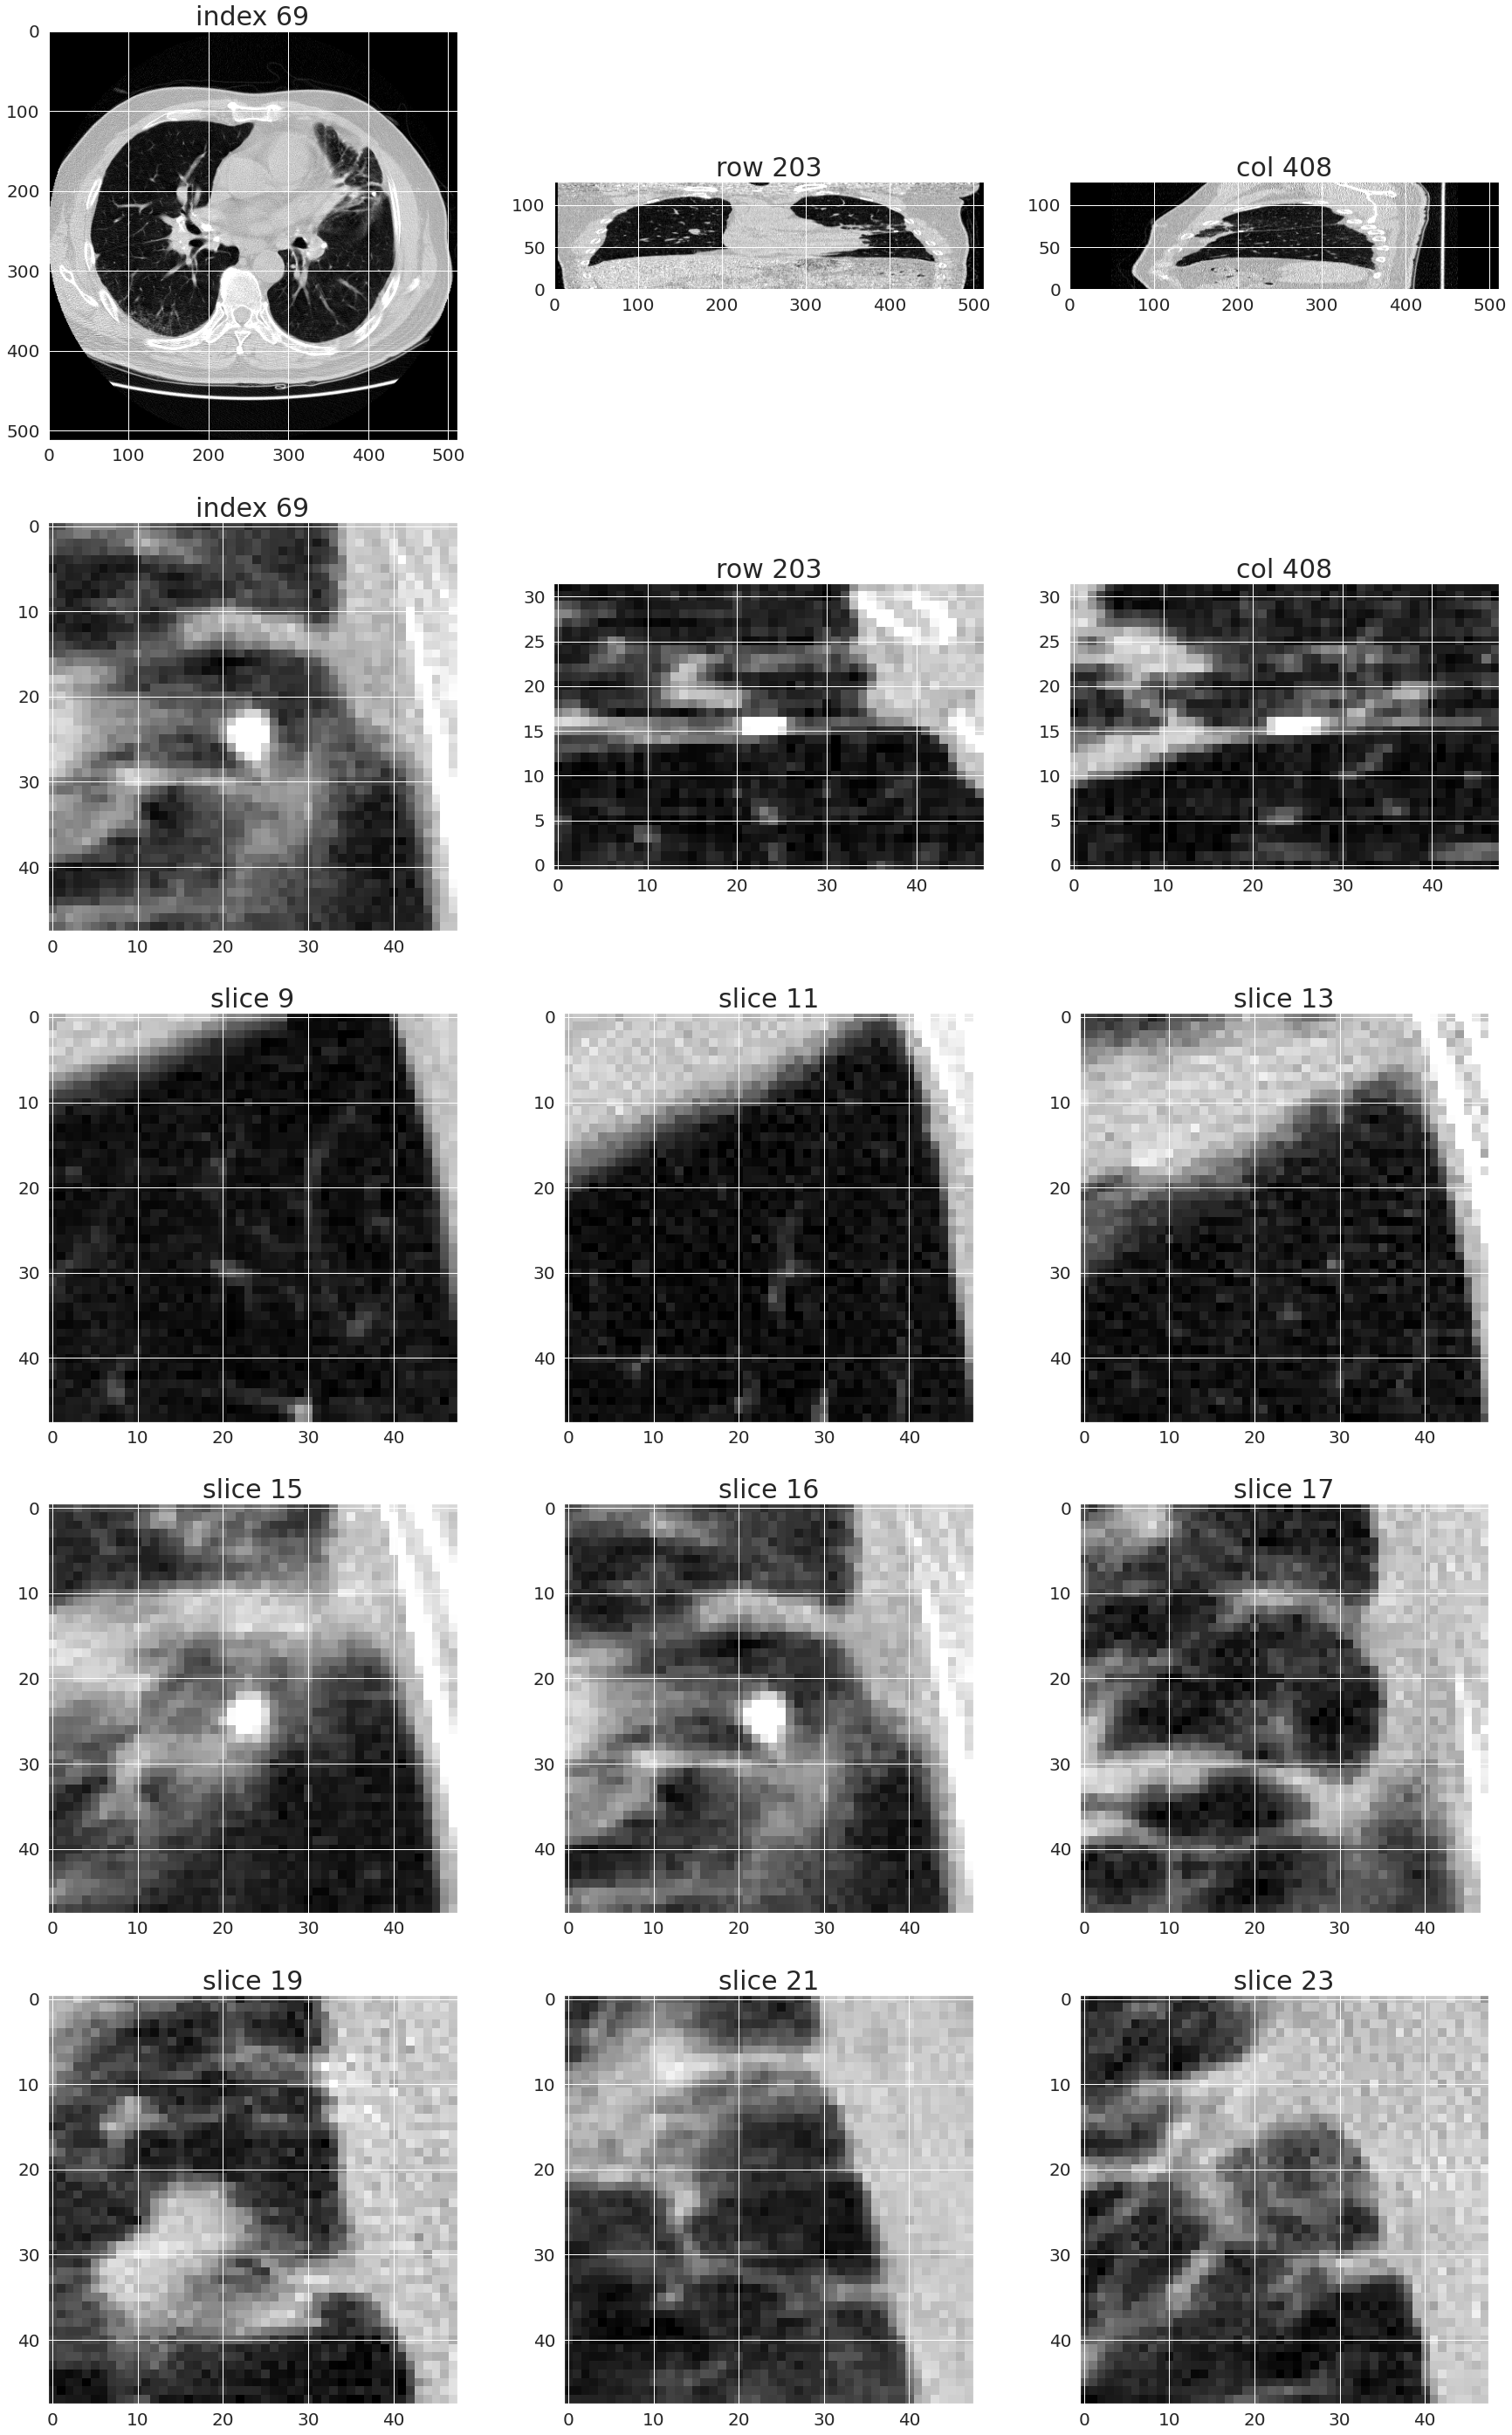

In [24]:
series_uid = positiveSample_list[11][2]
showCandidate(series_uid)

2021-03-07 08:22:16,620 INFO     pid:25281 src.dataset.dsets:173:__init__ <src.dataset.dsets.LunaDataset object at 0x7f1f5ca21df0>: 1061 training samples


<IPython.core.display.Javascript object>

1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 544 False [544]


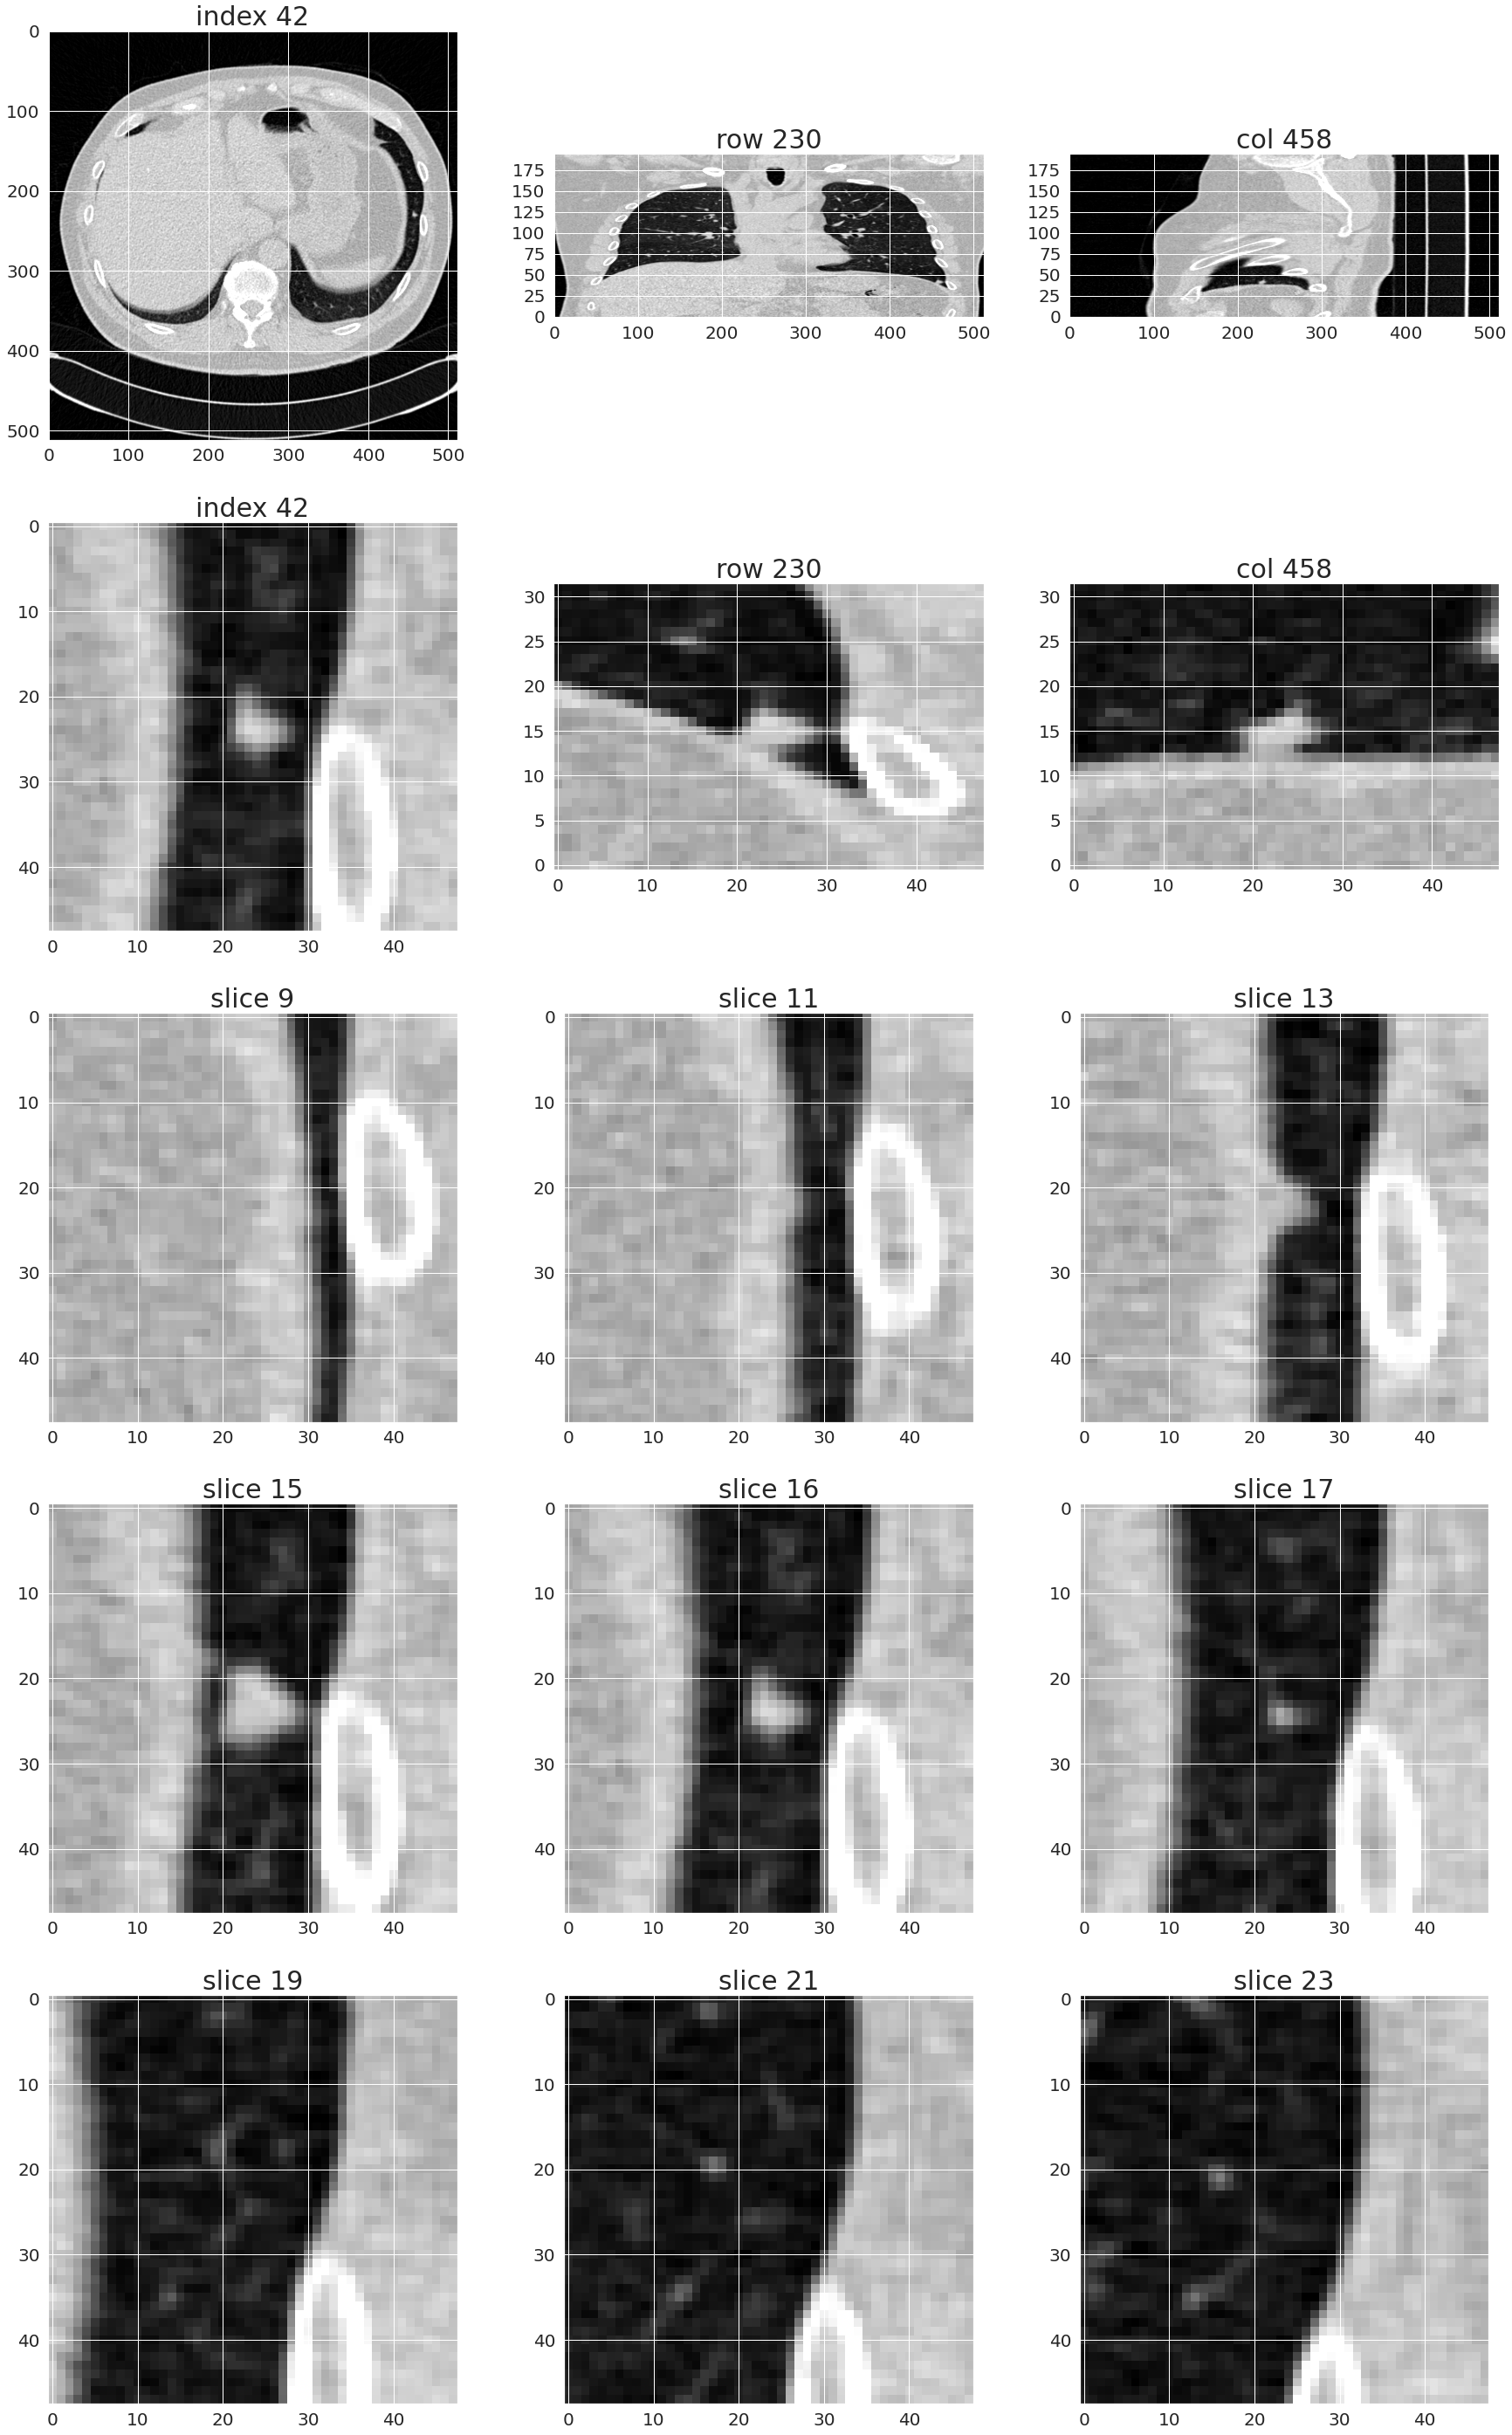

In [25]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(series_uid)

2021-03-07 08:22:22,763 INFO     pid:25281 src.dataset.dsets:173:__init__ <src.dataset.dsets.LunaDataset object at 0x7f1f8aa3c6a0>: 605 training samples


<IPython.core.display.Javascript object>

1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 49 False [49]


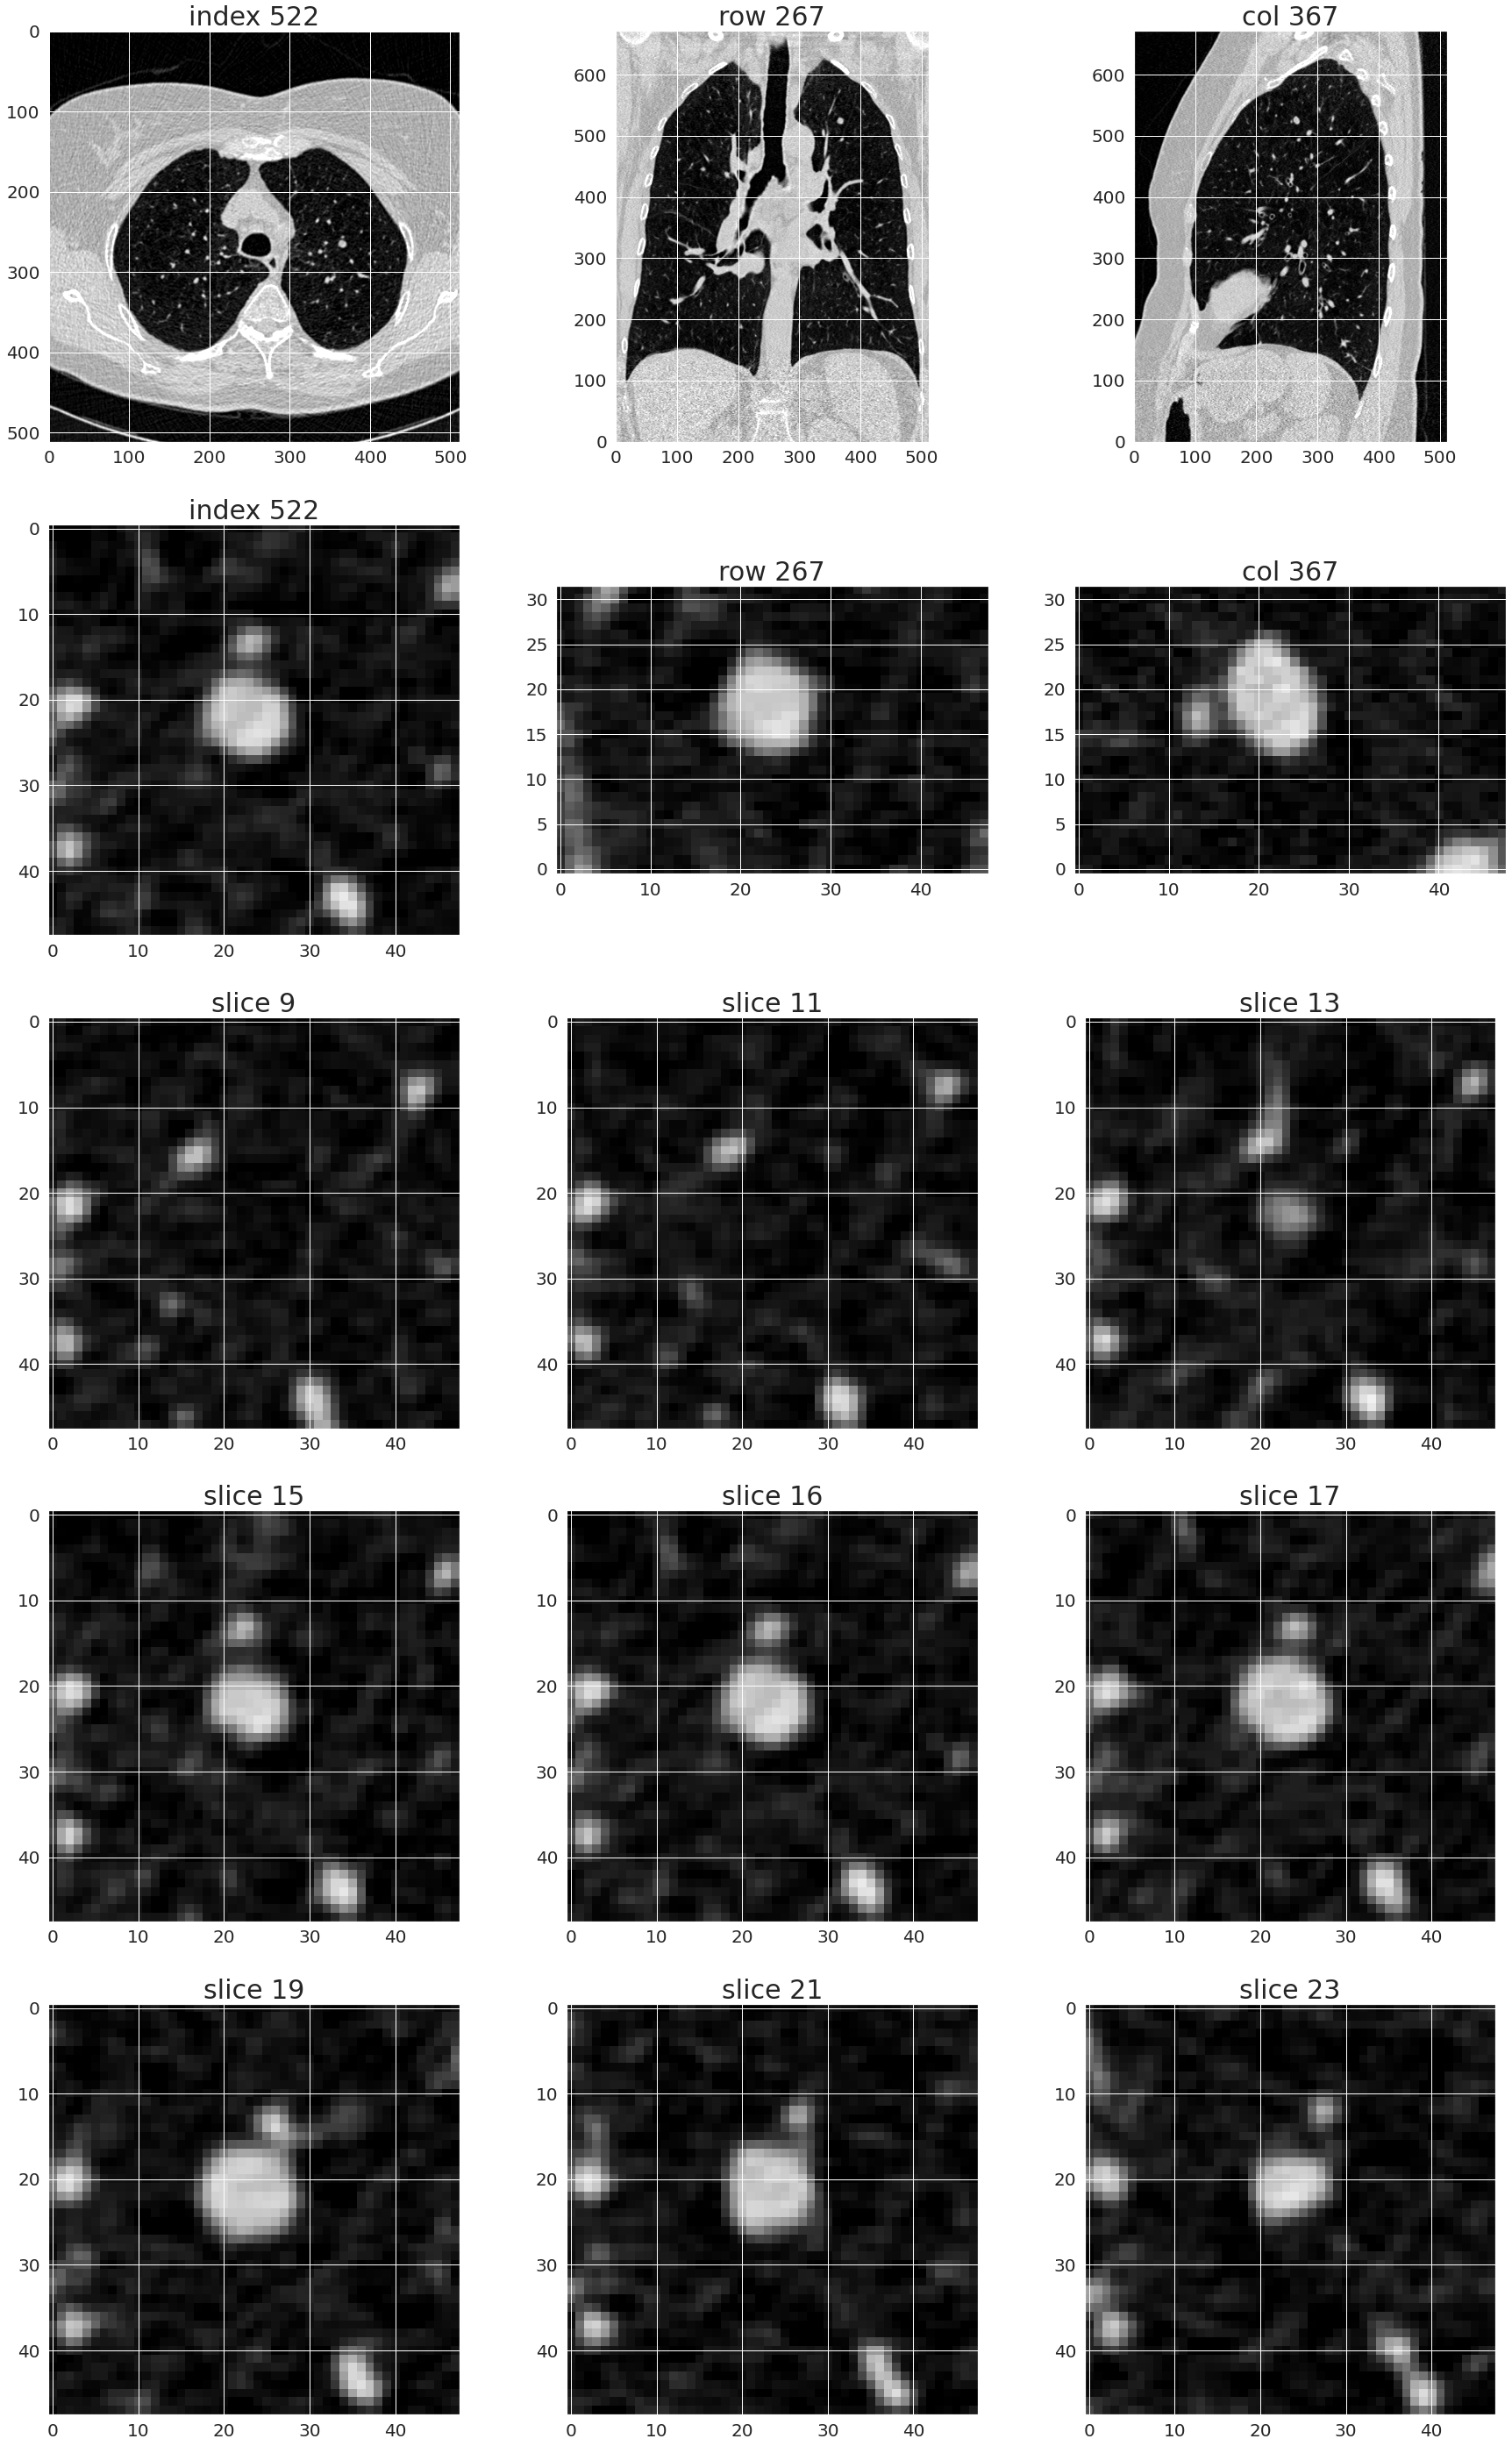

In [26]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
showCandidate(series_uid)

In [27]:
LunaDataset()[0]

2021-03-07 08:22:38,874 INFO     pid:25281 src.dataset.dsets:173:__init__ <src.dataset.dsets.LunaDataset object at 0x7f1f59403310>: 56938 training samples


(tensor([[[[ -895.,  -929.,  -884.,  ...,  -901.,  -888.,  -860.],
           [ -939.,  -905.,  -832.,  ...,  -944.,  -924.,  -926.],
           [ -904.,  -888.,  -956.,  ...,  -915.,  -906.,  -882.],
           ...,
           [ -945.,  -851.,  -862.,  ...,  -224.,  -235.,  -403.],
           [ -818.,  -909.,  -883.,  ...,  -346.,  -408.,  -570.],
           [ -865.,  -851.,  -923.,  ...,  -616.,  -664.,  -719.]],
 
          [[ -889.,  -899.,  -841.,  ...,  -895.,  -892.,  -896.],
           [ -871.,  -878.,  -884.,  ...,  -902.,  -915.,  -988.],
           [ -896.,  -909.,  -895.,  ...,  -917.,  -965.,  -823.],
           ...,
           [ -853.,  -842.,  -846.,  ...,     9.,    -7.,    43.],
           [ -831.,  -870.,  -862.,  ...,   -21.,   -63.,  -114.],
           [ -824.,  -822.,  -839.,  ...,  -267.,  -358.,  -549.]],
 
          [[ -916.,  -894.,  -888.,  ...,  -922.,  -864.,  -893.],
           [ -916.,  -948.,  -933.,  ...,  -825.,  -833.,  -884.],
           [ -881.,  -90

In [28]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)


ModuleNotFoundError: No module named 'ipyvolume'

In [ ]:
ct = getCt(series_uid)
ipv.quickvolshow(ct.hu_a, level=[0.25, 0.5, 0.9], opacity=0.1, level_width=0.1, data_min=-1000, data_max=1000)

# Note: the following visualization doesn't look very good.
It's only included here for completeness. 

In [20]:
import scipy.ndimage.morphology
def build2dLungMask(ct, mask_ndx, threshold_gcc = 0.7):
    dense_mask = ct.hu_a[mask_ndx] > threshold_gcc
    denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
    tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
    body_mask = scipy.ndimage.morphology.binary_fill_holes(tissue_mask)
    air_mask = scipy.ndimage.morphology.binary_fill_holes(body_mask & ~tissue_mask)

    lung_mask = scipy.ndimage.morphology.binary_dilation(air_mask, iterations=2)

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask


def build3dLungMask(ct):
    air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = mask_list = \
        [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]

    for mask_ndx in range(ct.hu_a.shape[0]):
        for i, mask_ary in enumerate(build2dLungMask(ct, mask_ndx)):
            mask_list[i][mask_ndx] = mask_ary

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask

In [21]:
from p2ch10.dsets import getCt
ct = getCt(series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = build3dLungMask(ct)


In [24]:
bones = ct.hu_a * (ct.hu_a > 1.5)
lungs = ct.hu_a * air_mask
ipv.figure()
ipv.pylab.volshow(bones + lungs, level=[0.17, 0.17, 0.23], data_min=100, data_max=900)
ipv.show()

C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)